#  Análisis de negocio


Una empresa de venta de entradas de eventos llamada Showz. Necesita ayuda para optimizar los gastos de marketing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



##  Acceda los datos y prepáralos para el análisis

In [2]:
costos = pd.read_csv('costs_us.csv')
ordenes = pd.read_csv('orders_log_us.csv')
visitas = pd.read_csv('visits_log_us.csv')

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 
Rutas de archivos

In [3]:
costos['dt']=pd.to_datetime(costos['dt'])
ordenes['Buy Ts']=pd.to_datetime(ordenes['Buy Ts'])
visitas['End Ts']=pd.to_datetime(visitas['End Ts'])
visitas['Start Ts']=pd.to_datetime(visitas['Start Ts'])

In [4]:
print(costos.head())
print(costos.info())

   source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [5]:
print(ordenes.head())
print(ordenes.info())

               Buy Ts  Revenue                   Uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844
3 2017-06-01 00:29:00     0.55  16109239769442553005
4 2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [6]:
print(visitas.head())
print(visitas.info())

    Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes:

##  Haz informes y calcula métricas 

Visitas:

¿Cuántas personas lo usan cada día, semana y mes?

Primero generamos columnas que identifique en que mes ,semana y año se realizo cada visita .

In [7]:
visitas['session_year'] = visitas['Start Ts'].dt.isocalendar().year
visitas['session_month'] = visitas['Start Ts'].dt.month
visitas['session_week']= visitas['Start Ts'].dt.isocalendar().week
visitas['session_date']= visitas['Start Ts'].dt.date

Posteriormente agrupamos por cada periodod e tiempo (dia , semana, mes) y obtenemos un promedio de cuantas visits se registraron en cada caso.

In [8]:
dau = visitas.groupby('session_date').agg({'Uid':'nunique'}).reset_index()
wau = visitas.groupby('session_week').agg({'Uid':'nunique'}).reset_index()
mau = visitas.groupby('session_month').agg({'Uid':'nunique'}).reset_index()
yau = visitas.groupby('session_year').agg({'Uid':'nunique'}).reset_index()


<Axes: xlabel='Dia', ylabel='N.de usuarios'>

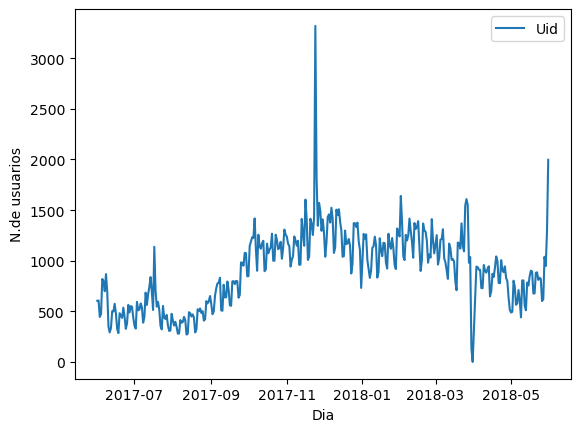

In [9]:
dau.plot(kind='line',
         x='session_date',
         y='Uid',
         xlabel="Dia",
         ylabel="N.de usuarios")

<Axes: xlabel='Semana', ylabel='N.de usuarios'>

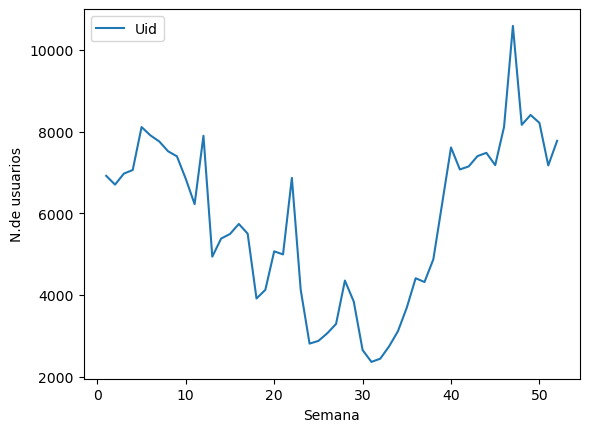

In [10]:
wau.plot(kind='line',
         x='session_week',
         y='Uid',
         xlabel="Semana",
         ylabel="N.de usuarios")

<Axes: xlabel='Mes', ylabel='N.de usuarios'>

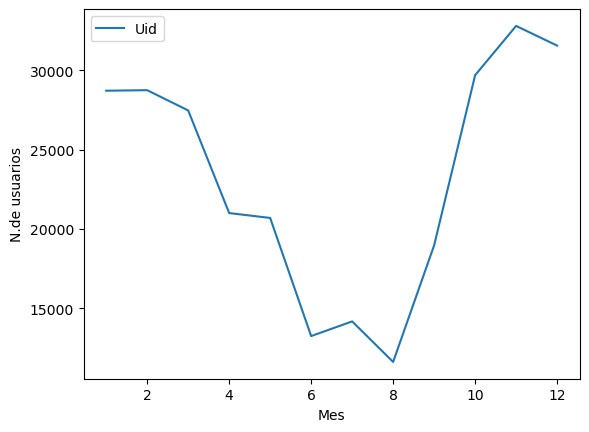

In [11]:
mau.plot(kind='line',
         x='session_month',
         y='Uid',
         xlabel="Mes",
         ylabel="N.de usuarios")

<Axes: xlabel='Año', ylabel='N.de usuarios'>

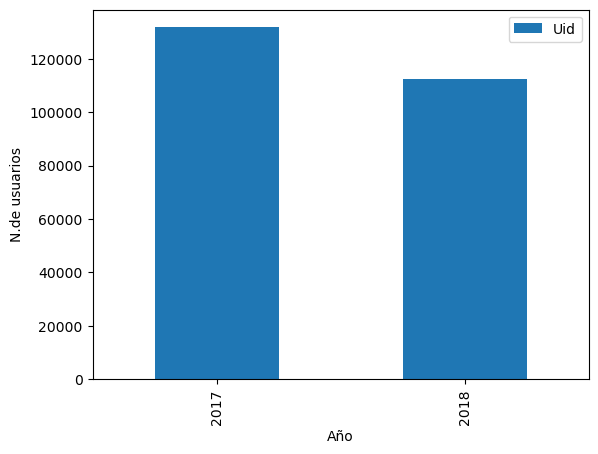

In [12]:
yau.plot(kind='bar',
         x='session_year',
         y='Uid',
         xlabel="Año",
         ylabel="N.de usuarios")

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).


Iniciamos pro agrupar los registros diarios por cada unico usuario  para posteriormente realizar una divicion de cuantas sesions hubo al dia y por cuantos usuarios fueron hechas y finammente sacamos un promedio.

<Axes: xlabel='Dia', ylabel='Sesions por usuario'>

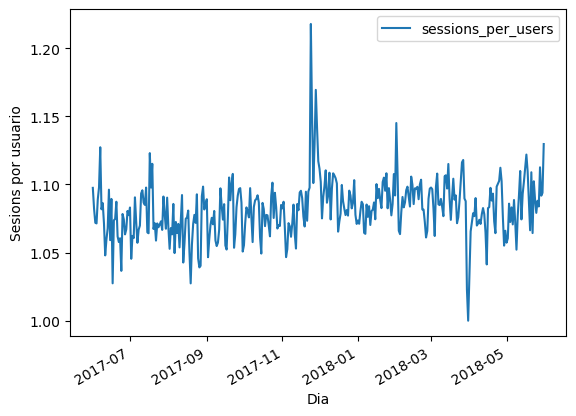

In [13]:
session_per_user = visitas.groupby('session_date').agg({'Uid':['count','nunique']})
session_per_user.columns = ['n_sessions','n_users']
session_per_user['sessions_per_users'] = (session_per_user['n_sessions']/session_per_user['n_users'])
session_per_user=session_per_user.reset_index()
session_per_user['session_date']= pd.to_datetime(session_per_user['session_date'])

session_per_user.plot(kind='line',
         x='session_date',
         y='sessions_per_users',
         xlabel="Dia",
         ylabel="Sesions por usuario")



podemos ver que el 2017-06-01 existieron 664 sesiones hechas por 605 usuarios es decir 1.097521 seciones por cada uno .

In [14]:
print('promedio de sesiones al dia por usuario:')
print(session_per_user['sessions_per_users'].mean())

promedio de sesiones al dia por usuario:
1.082169644003972



¿Cuál es la duración de cada sesión?


In [15]:
visitas['time_duration_ts']= (visitas['End Ts']-visitas['Start Ts']).dt.seconds
visitas.head()

,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date,time_duration_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


<class 'pandas.core.frame.DataFrame'>
Index: 228169 entries, 127491 to 177608
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Uid               228169 non-null  uint64 
 1   time_duration_ts  228169 non-null  float64
dtypes: float64(1), uint64(1)
memory usage: 5.2 MB
None


<Axes: xlabel='Usuario', ylabel='Tiempo de sesion (seg)'>

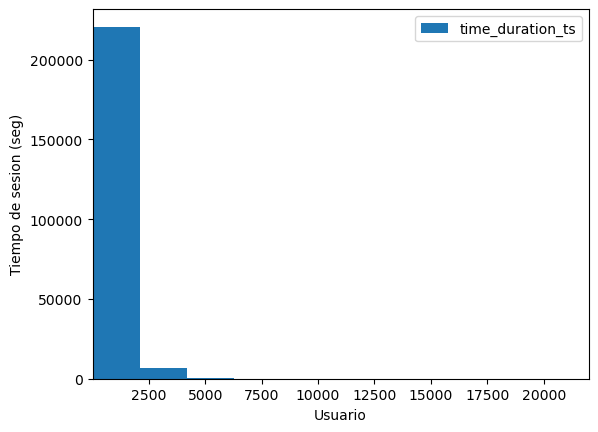

In [16]:
time_per_user= visitas.groupby('Uid').agg({'time_duration_ts':'mean'}).reset_index().sort_values(by='time_duration_ts')
print(time_per_user.info())
time_per_user.plot(kind='hist',
         x='Uid',
         y='time_duration_ts',
         xlabel="Usuario",
         ylabel="Tiempo de sesion (seg)",
         xlim=2)


¿Con qué frecuencia los usuarios regresan?

In [17]:
first_activity_date = visitas.groupby('Uid')['session_date'].min()
first_activity_date.name='first_activity_date'
visitas = visitas.join(first_activity_date, on='Uid')
visitas['first_activity_date']=pd.to_datetime(visitas['first_activity_date'])

visitas['session_date'] = pd.to_datetime(visitas['session_date'])


visitas['activity_week'] = pd.to_datetime(visitas['session_date'], unit='d') - pd.to_timedelta(visitas['session_date'].dt.dayofweek, unit='d')

visitas['first_activity_week'] = pd.to_datetime(visitas['first_activity_date'], unit='d') - pd.to_timedelta(visitas['first_activity_date'].dt.dayofweek, unit='d')

In [18]:
visitas['cohort_lifetime'] = (visitas['activity_week'] - visitas['first_activity_week'])

visitas['cohort_lifetime'] = visitas['cohort_lifetime'] / np.timedelta64(1, 'W')

visitas['cohort_lifetime'] = visitas['cohort_lifetime'].astype(int)

cohorts = (visitas.groupby(['first_activity_week', 'cohort_lifetime']).agg({'Uid': 'nunique'}).reset_index())

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'Uid']]

initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_activity_week')

cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

cohorts

retention = cohorts.pivot_table(
    index='first_activity_week', 
    columns='cohort_lifetime', 
    values='retention', 
    aggfunc='mean').round()

retention.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-06-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-06-19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,
2017-06-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-07-03,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,,,,,
2017-07-10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,,,,,,
2017-07-17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,,,,,,,
2017-07-24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,,,,,,,,


Ventas:

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)


In [19]:

ordenes = ordenes.join(first_activity_date, on='Uid')
ordenes['first_activity_date'] = pd.to_datetime(ordenes['first_activity_date'])

In [20]:
ordenes

,Buy Ts,Revenue,Uid,first_activity_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23


In [21]:
ordenes['Time _of _conv'] = pd.to_datetime(ordenes['first_activity_date'], unit='d') - pd.to_timedelta(ordenes['Buy Ts'].dt.dayofweek, unit='d')
ordenes['Time _of _conv'] = pd.to_timedelta(ordenes['Time _of _conv'].dt.dayofweek, unit='d')
ordenes

,Buy Ts,Revenue,Uid,first_activity_date,Time _of _conv
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0 days
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,0 days
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,0 days
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,0 days
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23,4 days


<Axes: xlabel='Tiempo de con', ylabel='N.de usuarios'>

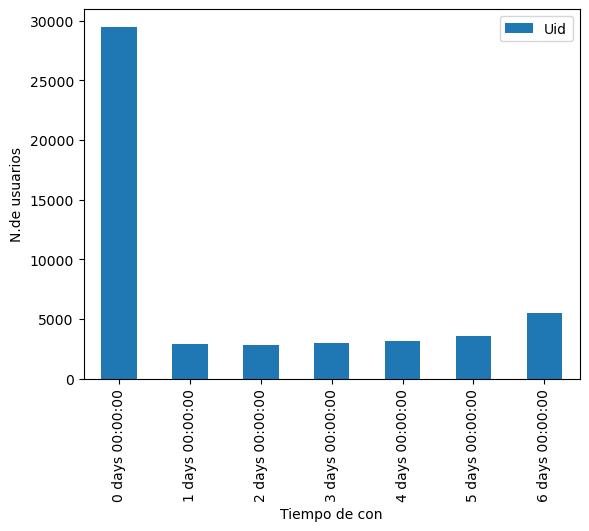

In [22]:
day_per_user = ordenes.groupby('Time _of _conv').agg({'Uid':'count'})
day_per_user=day_per_user.reset_index()

day_per_user

day_per_user.plot(kind='bar',
         x='Time _of _conv',
         y='Uid',
         xlabel="Tiempo de con",
         ylabel="N.de usuarios")

In [23]:
day_per_user

,Time _of _conv,Uid
0,0 days,29495
1,1 days,2943
2,2 days,2791
3,3 days,2979
4,4 days,3166
5,5 days,3548
6,6 days,5493


In [24]:
print("Tiempo de convercion promedio:")
print(ordenes['Time _of _conv'].mean()) 

Tiempo de convercion promedio:
1 days 14:28:34.204105920


¿Cuántos pedidos hacen durante un período de tiempo dado?

In [25]:
ordenes['orders_year'] = ordenes['Buy Ts'].dt.isocalendar().year
ordenes['orders_month'] = ordenes['Buy Ts'].dt.month
ordenes['orders_week']= ordenes['Buy Ts'].dt.isocalendar().week
ordenes['Buy Ts']= ordenes['Buy Ts'].dt.date

ordenes

,Buy Ts,Revenue,Uid,first_activity_date,Time _of _conv,orders_year,orders_month,orders_week
0,2017-06-01,17.00,10329302124590727494,2017-06-01,0 days,2017,6,22
1,2017-06-01,0.55,11627257723692907447,2017-06-01,0 days,2017,6,22
2,2017-06-01,0.37,17903680561304213844,2017-06-01,0 days,2017,6,22
3,2017-06-01,0.55,16109239769442553005,2017-06-01,0 days,2017,6,22
4,2017-06-01,0.37,14200605875248379450,2017-06-01,0 days,2017,6,22
...,...,...,...,...,...,...,...,...
50410,2018-05-31,4.64,12296626599487328624,2018-05-31,0 days,2018,5,22
50411,2018-05-31,5.80,11369640365507475976,2018-05-31,0 days,2018,5,22
50412,2018-05-31,0.30,1786462140797698849,2018-05-31,0 days,2018,5,22
50413,2018-05-31,3.67,3993697860786194247,2017-10-23,4 days,2018,5,22


In [26]:
compras_por_año = ordenes.groupby('orders_year').agg({'Buy Ts':'count'}).reset_index()
compras_por_año.columns=['year','orders']
print(compras_por_año)
print()
print("Compras prodedio por año:")
print(compras_por_año['orders'].mean())





   year  orders
0  2017   27467
1  2018   22948

Compras prodedio por año:
25207.5


In [27]:
compras_por_mes = ordenes.groupby('orders_month').agg({'Buy Ts':'count'}).reset_index()
compras_por_mes.columns=['month','orders']
print(compras_por_mes.head())
print()
print("Compras prodedio por mes:")
print(compras_por_mes['orders'].mean())


   month  orders
0      1    4721
1      2    5281
2      3    5326
3      4    3273
4      5    4346

Compras prodedio por mes:
4201.25


In [28]:
compras_por_semana = ordenes.groupby('orders_week').agg({'Buy Ts':'count'}).reset_index()
compras_por_semana.columns=['week','orders']
print(compras_por_semana.head())
print()
print("Compras prodedio por semana:")
print(compras_por_semana['orders'].mean())

   week  orders
0     1    1006
1     2     942
2     3     991
3     4    1128
4     5    1442

Compras prodedio por semana:
969.5192307692307


¿Cuál es el tamaño promedio de compra?

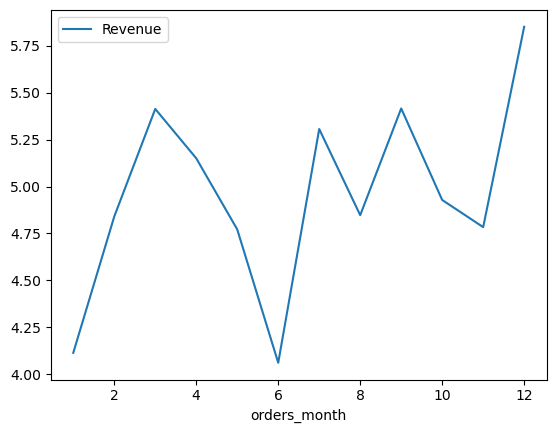

    orders_month   Revenue
0              1  4.112927
1              2  4.840095
2              3  5.413930
3              4  5.150645
4              5  4.771279
5              6  4.059834
6              7  5.306589
7              8  4.847139
8              9  5.416448
9             10  4.928280
10            11  4.783518
11            12  5.852139


In [29]:
monto_per_month = ordenes.groupby('orders_month').agg({'Revenue':'mean'}).reset_index()

monto_per_month.plot(kind='line',
                     x='orders_month',
                     y='Revenue')
plt.show()

print(monto_per_month)

¿Cuánto dinero traen? (LTV)

In [30]:
first_buy_date = ordenes.groupby('Uid')['Buy Ts'].min()
first_orders = ordenes.groupby('Uid').agg({'orders_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
first_orders.head()

,Uid,first_order_month
0,313578113262317,1
1,1575281904278712,6
2,2429014661409475,10
3,2464366381792757,1
4,2551852515556206,11


In [31]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,1,3898
1,2,4054
2,3,3856
3,4,2445
4,5,3194


In [32]:
ordenes=pd.merge(ordenes,first_orders, on='Uid')
ordenes.head()

,Buy Ts,Revenue,Uid,first_activity_date,Time _of _conv,orders_year,orders_month,orders_week,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,0 days,2017,6,22,6
1,2017-06-01,0.55,11627257723692907447,2017-06-01,0 days,2017,6,22,6
2,2017-06-01,0.37,17903680561304213844,2017-06-01,0 days,2017,6,22,6
3,2017-06-01,0.55,16109239769442553005,2017-06-01,0 days,2017,6,22,6
4,2017-06-01,0.37,14200605875248379450,2017-06-01,0 days,2017,6,22,6


In [33]:
tot_revenue = ordenes.groupby(['first_order_month','orders_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, tot_revenue, on='first_order_month')
report

,first_order_month,n_buyers,orders_month,Revenue
0,1,3898,1,19417.13
1,1,3898,2,8275.63
2,1,3898,3,7970.76
3,1,3898,4,3697.85
4,1,3898,5,2676.91
...,...,...,...,...
73,10,4030,11,1210.26
74,10,4030,12,436.28
75,11,3742,11,18911.11
76,11,3742,12,688.71


Suponiendo un margen de ganacia del 50%

In [34]:
margin_rate = 0.5
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['orders_month'] - report['first_order_month']) 
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,orders_month,Revenue,gp,age
0,1,3898,1,19417.13,9708.565,0
1,1,3898,2,8275.63,4137.815,1
2,1,3898,3,7970.76,3985.380,2
3,1,3898,4,3697.85,1848.925,3
4,1,3898,5,2676.91,1338.455,4


In [35]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='Revenue', 
    aggfunc='mean').round()

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
1,19417.0,8276.0,7971.0,3698.0,2677.0,562.0,818.0,908.0,3944.0,3940.0,3957.0,15077.0
2,17285.0,2216.0,616.0,720.0,282.0,406.0,303.0,924.0,960.0,772.0,685.0,
3,18648.0,1219.0,1221.0,88.0,310.0,196.0,274.0,1079.0,794.0,558.0,,
4,11325.0,1266.0,117.0,49.0,136.0,155.0,188.0,263.0,141.0,,,
5,14853.0,75.0,252.0,332.0,231.0,370.0,247.0,255.0,,,,
6,8436.0,299.0,242.0,295.0,276.0,223.0,115.0,,,,,
7,10406.0,319.0,437.0,394.0,140.0,136.0,,,,,,
8,6323.0,266.0,278.0,193.0,114.0,,,,,,,
9,11821.0,1207.0,360.0,455.0,,,,,,,,


In [36]:
ltv=output.loc[1].sum()

print("Promedio de cada cliente de la cohorte de enero :")
print(ltv)

Promedio de cada cliente de la cohorte de enero :
71245.0


Marketing:
1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 


In [37]:
ingresos = ordenes.groupby('Buy Ts').agg({'Revenue':'sum'}).reset_index()
ingresos.columns=['dt','Revenue']
ingresos['dt']=pd.to_datetime(ingresos['dt'])


In [38]:
costos = costos.merge(ingresos, on='dt')

In [39]:
print("Costos Totales:")
print(costos['costs'].sum())

Costos Totales:
329130.92000000004


In [40]:
costo_por_fuente = costos.groupby('source_id').agg({'costs':'sum'}).reset_index()
costo_por_fuente

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51756.40
5,9,5517.49
6,10,5822.49


In [41]:
costos['dt_week']= costos['dt'].dt.isocalendar().week
costo_por_semana = costos.groupby('dt_week').agg({'costs':'sum'}).reset_index()
costo_por_semana.head()

,dt_week,costs
0,1,8067.81
1,2,6855.05
2,3,7913.74
3,4,7174.12
4,5,8130.57


2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [42]:
first_activity = costos.groupby('source_id')['dt'].min().reset_index()
first_activity.columns = ['sourse_id', 'first_activity-_date']


In [43]:
costos= costos.join(first_activity,on='source_id')


In [44]:
costos['first_order_month']= costos['first_activity-_date'].dt.month
costos['first_order_month']=costos['first_order_month']


In [45]:
costos=costos.merge(cohort_sizes, on='first_order_month')

In [46]:
costos['cac']= costos['costs']/costos['n_buyers']


In [47]:
cac_por_fuente = costos.groupby('source_id').agg({'cac':'sum'}).reset_index()
cac_por_fuente

,source_id,cac
0,1,11.170654
1,2,22.952300
2,3,75.775673
3,4,32.747239
4,5,27.751421


3. ¿Cuán rentables eran las inversiones? (ROMI)

 

In [48]:
costos.head()

,source_id,dt,costs,Revenue,dt_week,sourse_id,first_activity-_date,first_order_month,n_buyers,cac
0,1,2017-06-01,75.20,389.46,22,2.0,2017-06-01,6.0,1865,0.040322
1,1,2017-06-02,62.25,324.11,22,2.0,2017-06-01,6.0,1865,0.033378
2,1,2017-06-03,36.53,166.48,22,2.0,2017-06-01,6.0,1865,0.019587
3,1,2017-06-04,55.00,195.21,22,2.0,2017-06-01,6.0,1865,0.029491
4,1,2017-06-05,57.08,441.49,23,2.0,2017-06-01,6.0,1865,0.030606


In [49]:
report= report.merge(costos,on='first_order_month',how='outer')


In [50]:
report['romi']= report['ltv']/report['cac']


In [51]:
output_= report.pivot_table(
    index= 'first_order_month',
    columns= 'age',
    values='romi',
    aggfunc= 'mean')

output_.cumsum().round(2)

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
6,61.5,2.18,1.77,2.15,2.01,1.62,0.84


Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

In [52]:
costos['source_id'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1810    5
1811    5
1812    5
1813    5
1814    5
Name: source_id, Length: 1815, dtype: int64>

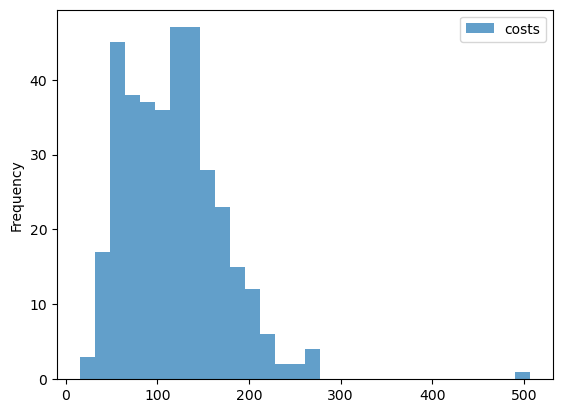

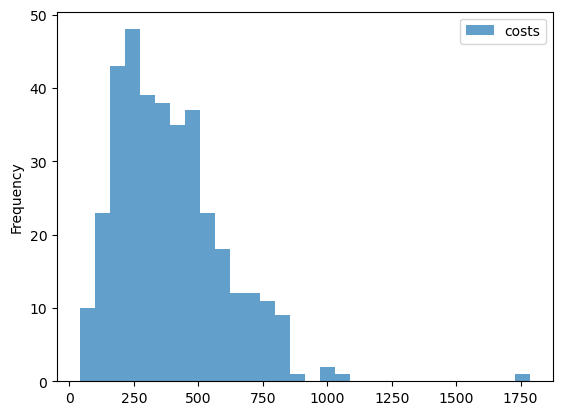

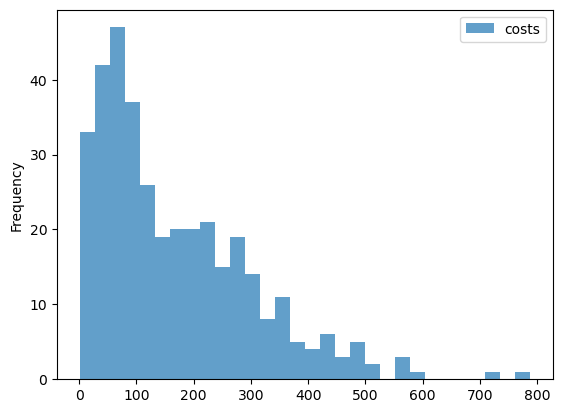

In [53]:
def grafica(source):
    costos[costos['source_id']==source].plot(kind='hist',
                                             x='dt',
                                             y='costs',
                                             alpha=0.7,
                                             bins=30)
    return plt.show()

sour =[2,3,4]
for valor in sour:
    grafica(valor)



<Axes: title={'center': 'Cohorts: Churn Rate'}, xlabel='age', ylabel='first_order_month'>

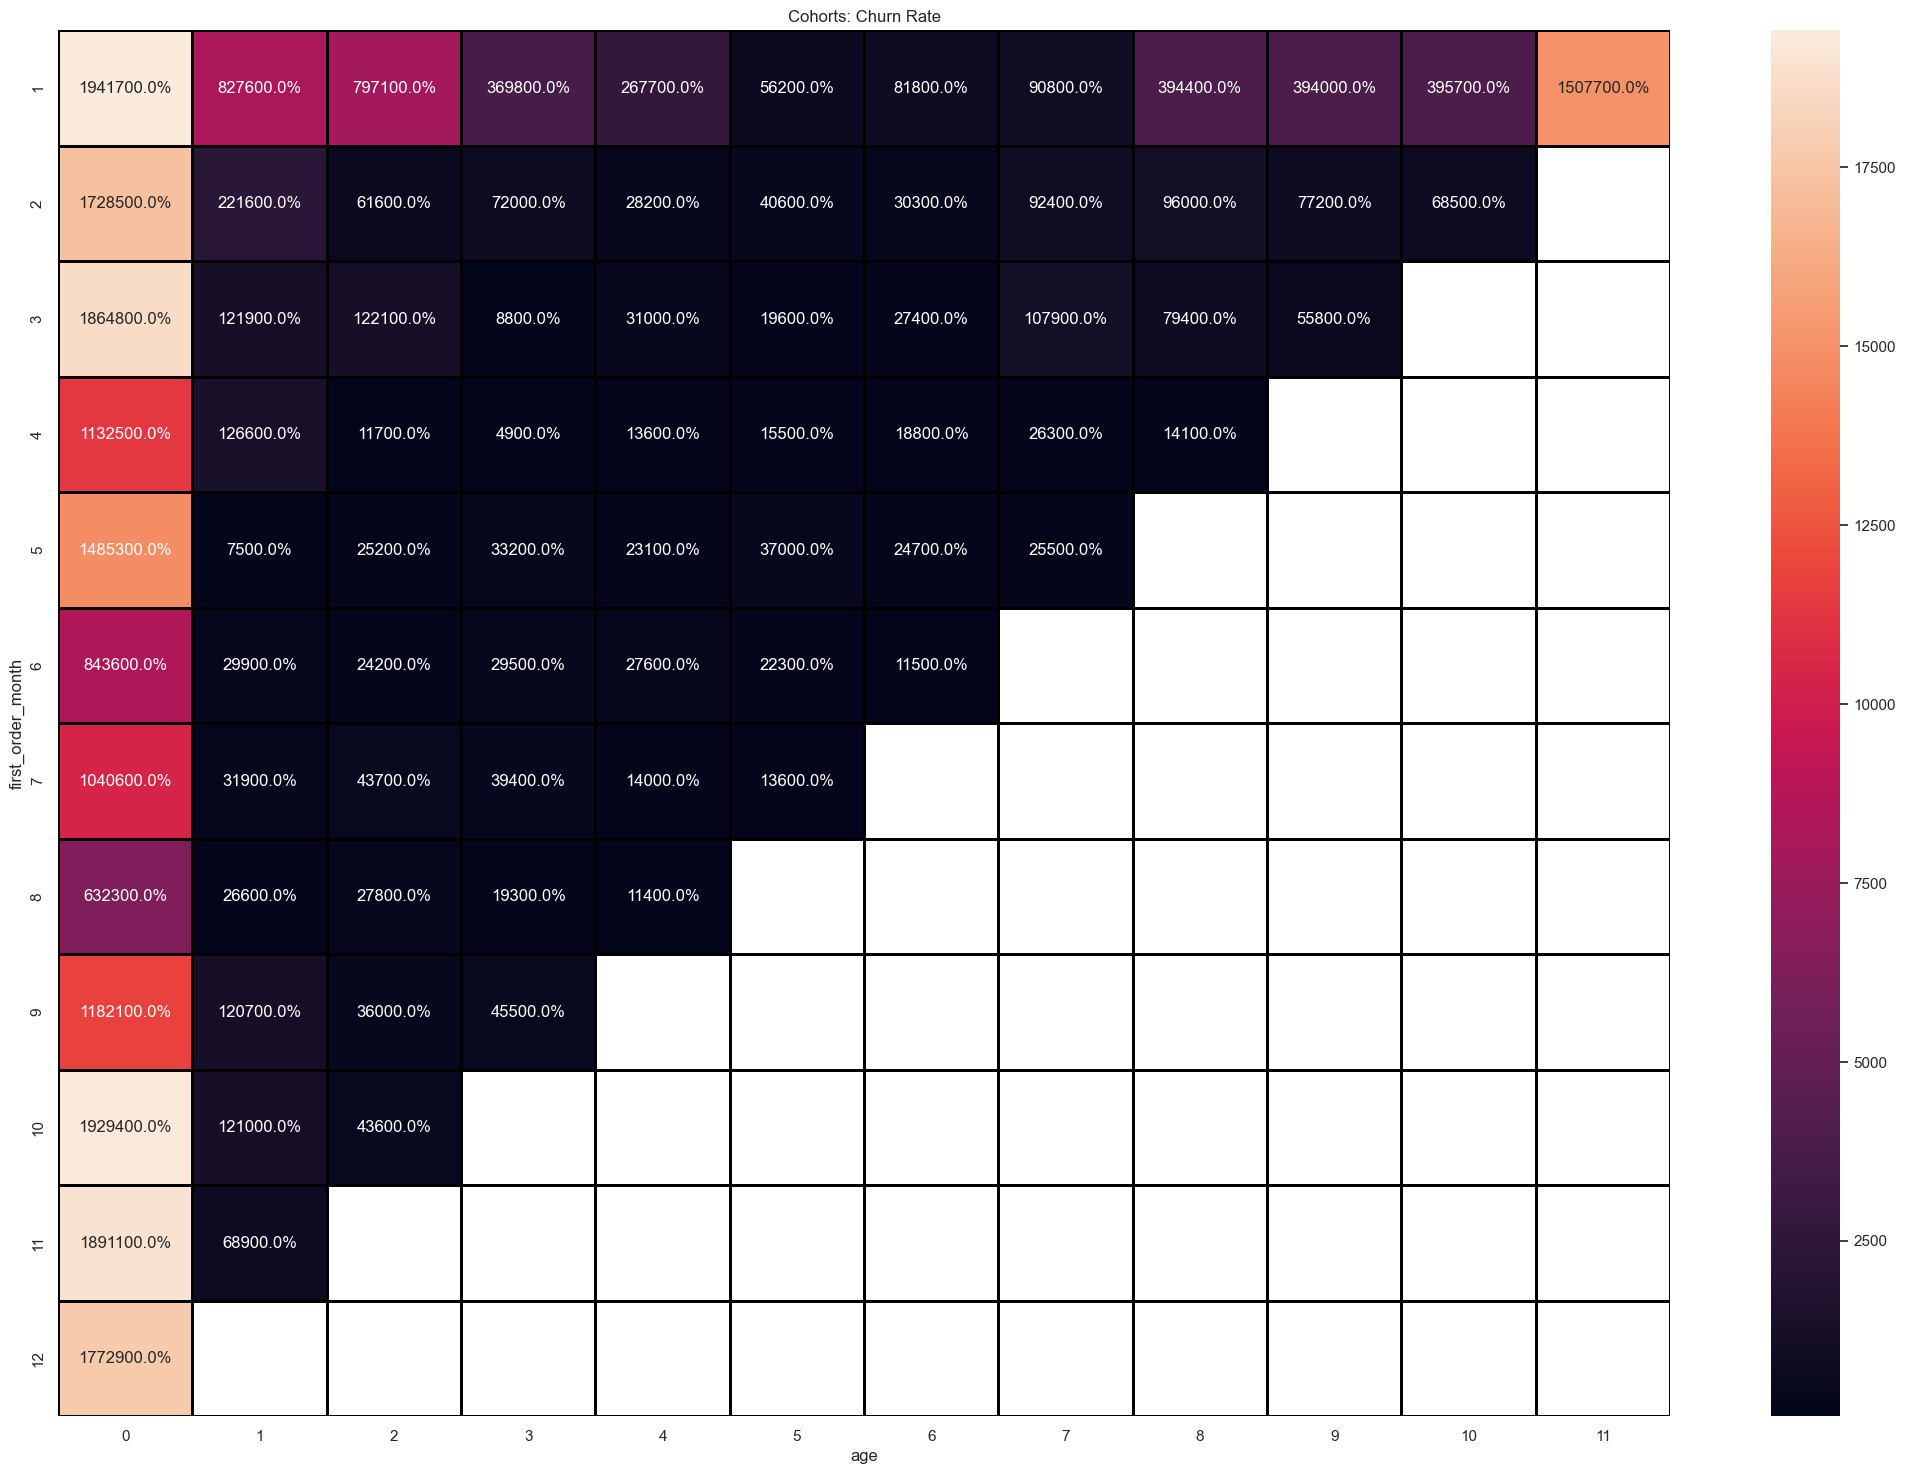

In [54]:
sns.set(style='white')
plt.figure(figsize=(26, 18))
plt.title('Cohorts: Churn Rate')
sns.heatmap(output,annot=True,fmt='.1%',linewidths=1,linecolor='black')